<a href="https://colab.research.google.com/github/Dhaneshkp/creditCardDefaulters/blob/main/TensorFlow_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

Everst_data=pd.read_csv('average_premium.csv')
data=Everst_data
data['Attained_age']=data['Age']+data['Duration']
data['Premium_rate']=data['BasePremiumAmount']/data['BaseNARAmount']*10000
#exclude_cols = ['Gender','RiskClass']
Coulmns_to_keep=['Age','Premium_rate','Gender','RiskClass','Duration']
#data=data[data['SingleOrJointType']=="Single"]
#data=data[data['Gender']=="Male"]
#data=data[data['RiskClass']=="NS1"]
data=data[Coulmns_to_keep]
data=data[(data['RiskClass']!="SS1") & (data['RiskClass']!="SS2")& (data['RiskClass']!="SP1")]
data['index']=data.index
numerical_columns = data.select_dtypes(include=['number']).columns
categorical_columns = data.select_dtypes(include=['object']).columns
data_copy=data.head((8657*2)*5).copy()
data=data.head((8657*2)*5)

<ipython-input-18-97ea74320f54>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['index']=data.index


In [ ]:
# Create a multi-index dataframe using Age, Duration, and a combined Gender and RiskClass column

import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
data['RiskClass'] = data['RiskClass'].replace({'N+1': 'NP2', 'NP1': 'NP2'}).replace({'NS3': 'NS2', 'NS2': 'NS2', 'NR1': 'NS2', 'NS1' : 'NS2'})
print(data)
print(data['RiskClass'].unique())
multi_index_df = data.set_index(['Age', 'Duration', data['Gender'] + '_' + data['RiskClass']])

# Convert the multi-index dataframe to a regular dataframe
result_df = multi_index_df.reset_index().drop(['Gender', 'RiskClass'], axis=1)
print(result_df)
result_df['level_2'].unique()

        Age  Premium_rate  Gender RiskClass  Duration  index
0      52.0     32.884713  Female       NP2       8.0      0
1      25.0      7.822222    Male       NP2       7.0      1
2      20.0      3.640212  Female       NS2       8.0      2
4      38.0     11.758730    Male       NP2       8.0      4
5      30.0      5.480635    Male       NS2       8.0      5
...     ...           ...     ...       ...       ...    ...
94676  42.0     11.339683  Female       NS2       6.0  94676
94677  61.0     63.149206  Female       NP2       6.0  94677
94678  30.0      4.814815    Male       NS2       7.0  94678
94679  33.0      6.109977    Male       NS2       7.0  94679
94680  26.0      7.918871    Male       NP2       7.0  94680

[86570 rows x 6 columns]
['NP2' 'NS2']
        Age  Duration     level_2  Premium_rate  index
0      52.0       8.0  Female_NP2     32.884713      0
1      25.0       7.0    Male_NP2      7.822222      1
2      20.0       8.0  Female_NS2      3.640212      2
3      3

array(['Female_NP2', 'Male_NP2', 'Female_NS2', 'Male_NS2'], dtype=object)

In [ ]:
# prompt: for the dsata  result_df_no_na one hot encode the level_2

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import pandas as pd

# Before removing NAs
print("Before removing NAs:")
print(result_df.describe(include='all'))
print(result_df.count())

# Drop rows with missing values
result_df_no_na = result_df.dropna()

# After removing NAs
print("\nAfter removing NAs:")
print(result_df_no_na.describe(include='all'))
print(result_df_no_na.count())


# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit the encoder to the 'level_2' column and transform it
encoded_data = encoder.fit_transform(result_df_no_na[['level_2']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['level_2']))

# Concatenate the encoded DataFrame with the original DataFrame
result_df_encoded = pd.concat([result_df_no_na, encoded_df], axis=1)

# Optionally, drop the original 'level_2' column
result_df_encoded.sort_values(by=['Age', 'Duration','level_2'], inplace=True)
result_df_encoded = result_df_encoded.drop('level_2', axis=1)

result_df_encoded.drop(['index'], axis=1,inplace=True)

print(result_df_encoded)

Before removing NAs:
                 Age      Duration     level_2  Premium_rate         index
count   86570.000000  86570.000000       86570  86570.000000  86570.000000
unique           NaN           NaN           4           NaN           NaN
top              NaN           NaN  Female_NP2           NaN           NaN
freq             NaN           NaN       27164           NaN           NaN
mean       37.301167      4.813758         NaN     13.043304  47351.311748
std        11.228307      2.520950         NaN     22.778161  27326.207212
min        18.000000      1.000000         NaN     -9.301587      0.000000
25%        28.000000      3.000000         NaN      4.121693  23676.250000
50%        36.000000      5.000000         NaN      7.227513  47378.500000
75%        45.000000      7.000000         NaN     13.100529  71019.750000
max        70.000000     10.000000         NaN   1499.437037  94680.000000
Age             86570
Duration        86570
level_2         86570
Premium_rate 

In [ ]:
# prompt: instead of the encoder above do the same finding the minimu and maximum values for contonous value columns , scale the variable using the maximum value s

# Assuming 'result_df_no_na' is your DataFrame from the preceding code

# Identify continuous value columns
continuous_cols = ['Age', 'Duration', 'Premium_rate']  # Replace with actual column names

# Calculate minimum and maximum values for each continuous column
min_values = result_df_encoded[continuous_cols].min()
max_values = result_df_encoded[continuous_cols].max()

# Scale the continuous variables using maximum values
for col in continuous_cols:
    result_df_encoded[col] = result_df_encoded[col] / max_values[col]

# Display the scaled DataFrame
print(result_df_encoded)
max_values

            Age  Duration  Premium_rate  level_2_Female_NP2  \
1245   0.257143       0.1      0.001301                 1.0   
8302   0.257143       0.1      0.001301                 1.0   
15882  0.257143       0.1      0.001314                 1.0   
27857  0.257143       0.1      0.001428                 1.0   
32246  0.257143       0.1      0.001194                 1.0   
...         ...       ...           ...                 ...   
12239  1.000000       0.9      0.137284                 0.0   
12840  1.000000       0.9      0.137255                 0.0   
24944  1.000000       0.9      0.137284                 0.0   
22421  1.000000       1.0      0.212327                 0.0   
37180  1.000000       1.0      0.212323                 0.0   

       level_2_Female_NS2  level_2_Male_NP2  level_2_Male_NS2  
1245                  0.0               0.0               0.0  
8302                  0.0               0.0               0.0  
15882                 0.0               0.0        

Age               70.000000
Duration          10.000000
Premium_rate    1499.437037
dtype: float64

In [ ]:
# prompt: use a hyper parameter search on the model using CNN , og the data set ; use convolutional newral nets directly not through keras regressor, use a for loop instaed of using gridsearch and parameters its not working

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'result_df_encoded' is your DataFrame from the preceding code

# Split the data into features (X) and target variable (y)
X_df = result_df_encoded.drop('Premium_rate', axis=1)
y_df = result_df_encoded['Premium_rate']

# Reshape the input data for CNN (samples, timesteps, features)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)


In [ ]:
X_train

,Age,Duration,level_2_Female_NP2,level_2_Female_NS2,level_2_Male_NP2,level_2_Male_NS2
70286,0.614286,0.6,0.0,1.0,0.0,0.0
60343,0.442857,0.4,0.0,0.0,0.0,1.0
70586,0.871429,0.5,0.0,0.0,1.0,0.0
60303,0.514286,0.6,0.0,0.0,1.0,0.0
20722,0.400000,0.3,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
37919,0.314286,0.8,0.0,0.0,1.0,0.0
69100,0.585714,0.2,0.0,0.0,0.0,1.0
42327,0.742857,0.6,1.0,0.0,0.0,0.0
56748,0.271429,0.1,0.0,1.0,0.0,0.0


In [ ]:
X_train_np= X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_np= X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)
y_train_np= y_train.values.reshape(y_train.shape[0], 1)
y_test_np= y_test.values.reshape(y_test.shape[0], 1)

In [ ]:

# Hyperparameter options
filters_list = [16, 32, 64]
kernel_sizes_list = [2, 3, 5]
dense_units_list = [32, 64, 128]

best_mse = float('inf')
best_params = {}

# Iterate over hyperparameter combinations
for filters in filters_list:
    for kernel_size in kernel_sizes_list:
        for dense_units in dense_units_list:
            # Build the CNN model
            model = Sequential()
            model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu', input_shape=(X_train.shape[1], 1)))
            model.add(MaxPooling1D())
            model.add(Flatten())
            model.add(Dense(dense_units, activation='relu'))
            model.add(Dense(1))  # Output layer for regression

            # Compile the model
            model.compile(optimizer='adam', loss='mean_squared_error')

            # Train the model
            model.fit(X_train_np, y_train_np, epochs=10, batch_size=32, verbose=0)

            # Evaluate the model
            y_pred = model.predict(X_test_np)
            mse = mean_squared_error(y_test_np, y_pred)

            # Update best parameters if current model performs better
            if mse < best_mse:
                best_mse = mse
                best_params = {'filters': filters, 'kernel_size': kernel_size, 'dense_units': dense_units}

# Print the best hyperparameters and corresponding MSE
print("Best Hyperparameters:", best_params)
print("Best MSE:", best_mse)


542/542 [==============================] - 1s 2ms/step
Best Hyperparameters: {'filters': 32, 'kernel_size': 2, 'dense_units': 128}
Best MSE: 7.601820647753138e-05


In [ ]:
# prompt: scale back X_test using the max values to recrate the x_test in original, scale inckluding the level_2 encoded columns as well , note the targe tpremiuum rate is in y_test

# Extract the encoded column names
encoded_column_names = result_df_encoded.columns[3:]  # Assuming encoded columns start from the 4th column
continuous_cols = ['Age', 'Duration'] # Replace with actual column names

# Scale back continuous columns
# Create a DataFrame from X_test for easier manipulation

# Scale back continuous columns
for i, col in enumerate(continuous_cols):
    X_test[i] = X_test[i] * max_values[col]
X_test


KeyError: 0

In [ ]:
# prompt: select the bst model from above and apply on the data to show te also scale the premium back to original scale predicted and actual premiums  , also show other ccolumns in the data set

# Build the best CNN model based on identified hyperparameters
best_model = Sequential()
best_model.add(Conv1D(filters=best_params['filters'], kernel_size=best_params['kernel_size'], activation='relu', input_shape=(X_train.shape[1], 1)))
best_model.add(MaxPooling1D())
best_model.add(Flatten())
best_model.add(Dense(best_params['dense_units'], activation='relu'))
best_model.add(Dense(1))  # Output layer for regression

# Compile the best model
best_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the best model (you might want to adjust epochs and batch_size)
best_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict on the test set
y_pred_scaled = best_model.predict(X_test)

# Scale predicted and actual premiums back to original scale
y_pred_original = y_pred_scaled * max_values['Premium_rate']
y_test_original = y_test * max_values['Premium_rate']

# Create a DataFrame to compare actual and predicted premiums along with other columns
comparison_df = pd.DataFrame({
    'Age': (X_test[:, 0] * max_values['Age']).flatten(),  # Assuming Age is the first column in X_test
    'Duration': (X_test[:, 1] * max_values['Duration']).flatten(),  # Assuming Duration is the second column
    # ... (include other relevant columns from X_test)
    'Actual Premium': y_test_original.flatten(),
    'Predicted Premium': y_pred_original.flatten()
})



Epoch 1/10
2165/2165 [==============================] - 7s 3ms/step - loss: 1.3163e-04
Epoch 2/10
2165/2165 [==============================] - 5s 2ms/step - loss: 9.5635e-05
Epoch 3/10
2165/2165 [==============================] - 5s 2ms/step - loss: 8.9125e-05
Epoch 4/10
2165/2165 [==============================] - 6s 3ms/step - loss: 8.5033e-05
Epoch 5/10
2165/2165 [==============================] - 5s 2ms/step - loss: 8.2673e-05
Epoch 6/10
2165/2165 [==============================] - 6s 3ms/step - loss: 8.1179e-05
Epoch 7/10
2165/2165 [==============================] - 5s 2ms/step - loss: 8.0873e-05
Epoch 8/10
2165/2165 [==============================] - 5s 2ms/step - loss: 7.8920e-05
Epoch 9/10
2165/2165 [==============================] - 7s 3ms/step - loss: 7.8329e-05
Epoch 10/10
542/542 [==============================] - 1s 1ms/step


In [ ]:
comparison_df.sort_values(by=['Age', 'Duration'], inplace=True)

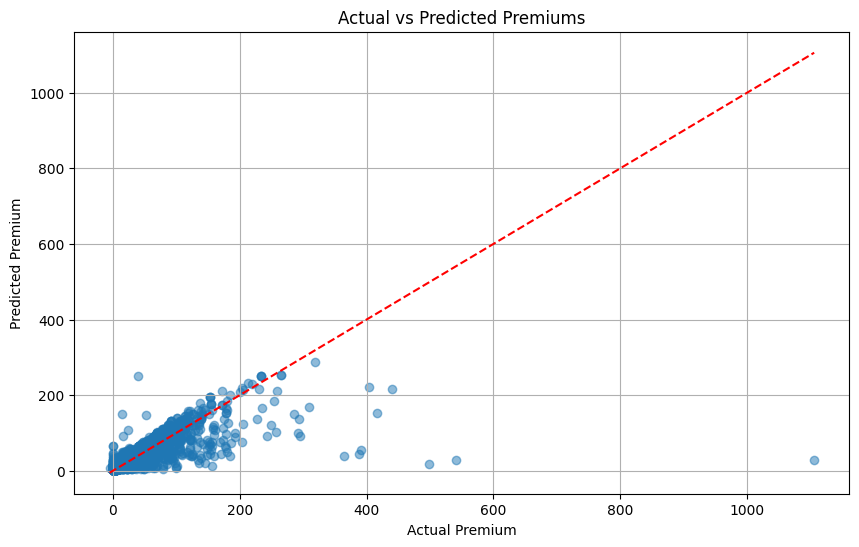

In [ ]:
# prompt: plot predicted and actual

import matplotlib.pyplot as plt

# Assuming 'comparison_df' is your DataFrame from the preceding code

# Scatter plot of actual vs predicted premiums
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual Premium'], comparison_df['Predicted Premium'], alpha=0.5)
plt.xlabel('Actual Premium')
plt.ylabel('Predicted Premium')
plt.title('Actual vs Predicted Premiums')
plt.grid(True)

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(comparison_df['Actual Premium']), max(comparison_df['Actual Premium'])],
         [min(comparison_df['Actual Premium']), max(comparison_df['Actual Premium'])],
         linestyle='--', color='red')

plt.show()
